<a href="https://colab.research.google.com/github/Vignesh-kanna/ml_with_flask/blob/main/Day21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import files
uploaded = files.upload()


Saving Civil_Engineering_Regression_Dataset.csv to Civil_Engineering_Regression_Dataset (2).csv


In [8]:
df = pd.read_csv("Civil_Engineering_Regression_Dataset.csv")

In [9]:
print("First 5 Rows of Dataset:")
print(df.head())

First 5 Rows of Dataset:
   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0           1        21.854305                       9   70.213332   
1           2        47.782144                       9  142.413614   
2           3        37.939727                       3  110.539985   
3           4        31.939632                       6  250.784939   
4           5        12.020839                       7  167.575159   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0          45.326394          8.804790              4        2400.287931  
1          47.900505          6.727632              6        3705.461312  
2          22.112484          8.208544              8        2653.631004  
3          26.267562          7.094515              4        2534.099466  
4          40.134306          6.160303              6        1741.179333  


In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Project_ID                0
Building_Height           0
Material_Quality_Index    0
Labor_Cost                0
Concrete_Strength         0
Foundation_Depth          0
Weather_Index             0
Construction_Cost         0
dtype: int64


In [11]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [12]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
count  100.000000       100.000000              100.000000  100.000000   
mean    50.500000        26.158133                5.940000  188.582366   
std     29.011492        13.387023                2.048996   69.448489   
min      1.000000         5.248495                3.000000   54.518841   
25%     25.750000        13.694034                4.000000  130.371094   
50%     50.500000        25.886410                6.000000  182.399916   
75%     75.250000        37.859140                8.000000  251.182520   
max    100.000000        49.409912                9.000000  299.063425   

       Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
count         100.000000        100.000000     100.000000         100.000000  
mean           33.624225          5.784751       5.900000        2307.354667  
std             9.154865          2.450679       1.920122         702.49142

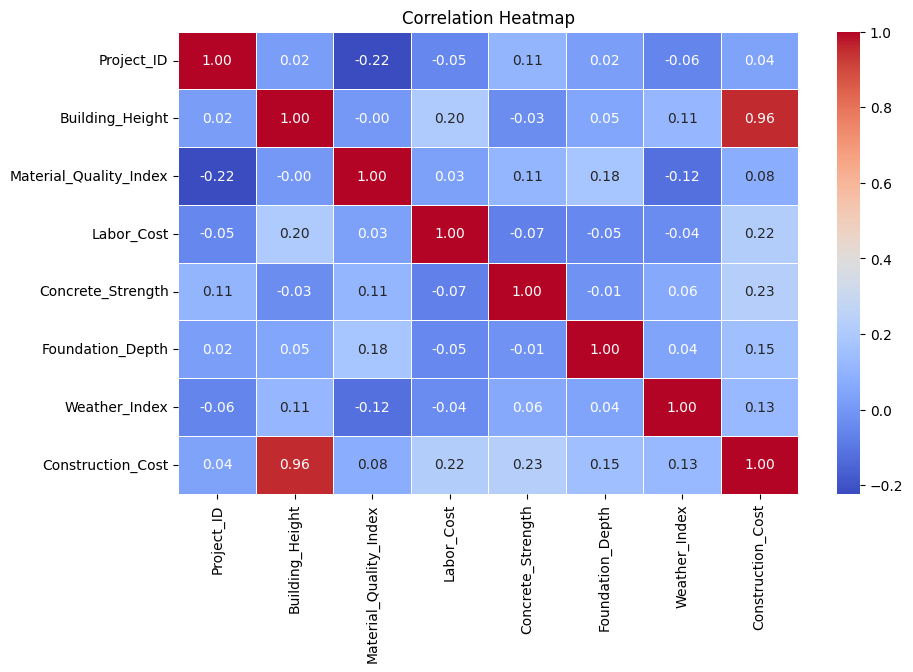

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [14]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [15]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
scaler = StandardScaler()  # Use MinMaxScaler() if you prefer
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

<ipython-input-17-803ed38a92d7>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.71481604 -1.68017329 -1.64553055 -1.6108878  -1.57624505 -1.5416023
 -1.50695955 -1.4723168  -1.43767406 -1.40303131 -1.36838856 -1.33374581
 -1.29910306 -1.26446031 -1.22981757 -1.19517482 -1.16053207 -1.12588932
 -1.09124657 -1.05660382 -1.02196108 -0.98731833 -0.95267558 -0.91803283
 -0.88339008 -0.84874733 -0.81410459 -0.77946184 -0.74481909 -0.71017634
 -0.67553359 -0.64089084 -0.6062481  -0.57160535 -0.5369626  -0.50231985
 -0.4676771  -0.43303435 -0.39839161 -0.36374886 -0.32910611 -0.29446336
 -0.25982061 -0.22517786 -0.19053512 -0.15589237 -0.12124962 -0.08660687
 -0.05196412 -0.01732137  0.01732137  0.05196412  0.08660687  0.12124962
  0.15589237  0.19053512  0.22517786  0.25982061  0.29446336  0.32910611
  0.36374886  0.39839161  0.43303435  0.4676771   0.50231985  0.5369626
  0.57160535  0.6062481   0.64089084  0.675533

In [23]:
target_column_name = df.columns[-1]
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nDataset after Preprocessing:")
print(df.head())

print("\nData Splitting Completed!")
print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Dataset after Preprocessing:
   Project_ID  Building_Height  Material_Quality_Index  Labor_Cost  \
0   -1.714816        -0.323112                1.500938   -1.713001   
1   -1.680173         1.623434                1.500938   -0.668140   
2   -1.645531         0.884509               -1.442078   -1.129406   
3   -1.610888         0.434049                0.029430    0.900177   
4   -1.576245        -1.061365                0.519933   -0.304010   

   Concrete_Strength  Foundation_Depth  Weather_Index  Construction_Cost  
0           1.284685          1.238536      -0.994505        2400.287931  
1           1.567276          0.386681       0.052342        3705.461312  
2          -1.263780          0.994012       1.099190        2653.631004  
3          -0.807628          0.537142      -0.994505        2534.099466  
4           0.714688          0.154016       0.052342        1741.179333  

Data Splitting Completed!
Training Samples: 80, Testing Samples: 20


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [28]:
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")


Linear Regression Performance:
RMSE: 10.81
R² Score: 1.00

Random Forest Performance:
RMSE: 187.88
R² Score: 0.94


In [30]:
new_data = np.array([[0.5, 0.8, 1.2, 0.7, 0, 0, 0]])  # Pad with zeros for the missing 3 features
new_data_scaled = scaler.transform(new_data)
predicted_cost = rf_model.predict(new_data_scaled)
print(f"\nPredicted Construction Cost: ${predicted_cost[0]:.2f}")


Predicted Construction Cost: $1246.27


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters:", grid_search.best_params_)

# Train the best model
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the optimized model
evaluate_model(y_test, y_pred_best_rf, "Optimized Random Forest")


Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}

Optimized Random Forest Performance:
RMSE: 185.69
R² Score: 0.94


<ipython-input-32-b25f86b3d117>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')


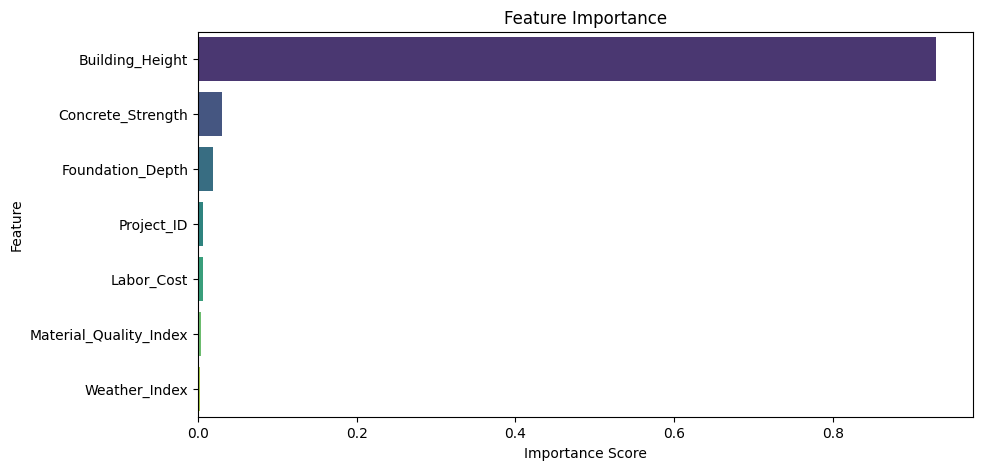

In [32]:
# Get feature importances from the trained model
feature_importances = best_rf_model.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [33]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
evaluate_model(y_test, y_pred_xgb, "XGBoost")



XGBoost Performance:
RMSE: 147.98
R² Score: 0.96
